In [3]:
library(skimr)
library(ggplot2)
library(GGally, quietly=TRUE)

In [4]:
library(data.table)

In [5]:
dt=fread("IE582_Fall20_ProjectTrain.csv")
final_test=fread("IE582_Fall20_ProjectTest.csv")

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Warning message in cor(data, use = method[1], method = method[2]):
"the standard deviation is zero"

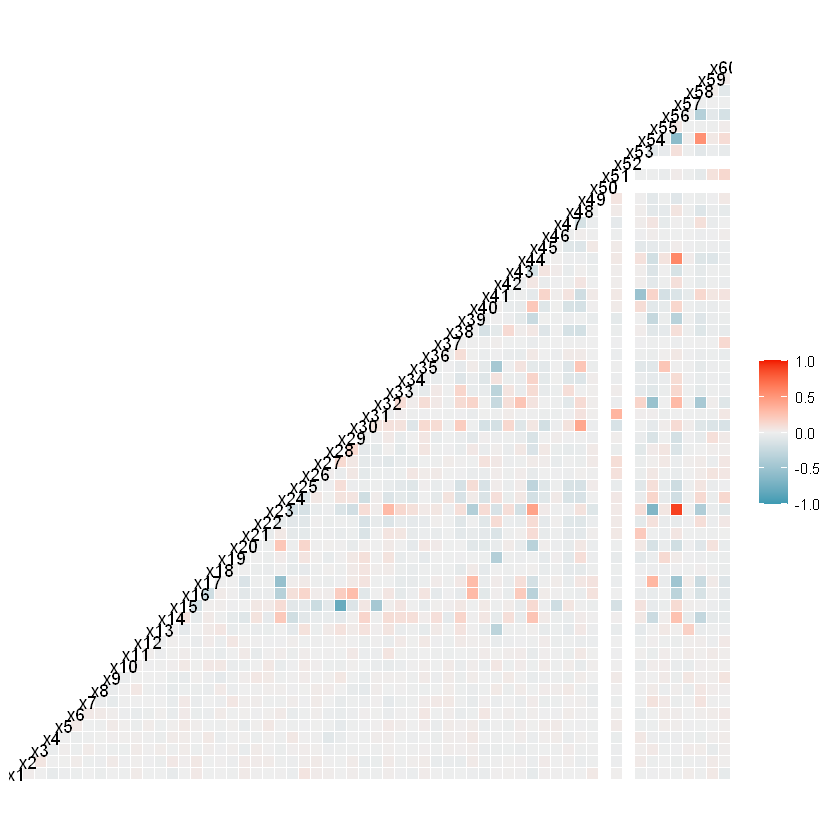

In [6]:
library(corrplot)
ggcorr(data.frame(dt[,0:60]), method = c("everything", "pearson")) 

# Decision Tree

In [7]:
dt$y_num=as.numeric(as.factor(dt$y))
dt[,y:=NULL]
#str(dt)
#head(dt)

### Subsetting

In [8]:
library(caTools)

In [9]:
set.seed(35)
spl=sample.split(dt$y, SplitRatio = 0.8)
train=subset(dt,spl==TRUE)
test=subset(dt,spl==FALSE)

## Categorical Decision Tree

In [10]:
library(rpart)
library(rattle)

Warning message:
"package 'rattle' was built under R version 3.6.3"Loading required package: tibble
Warning message:
"package 'tibble' was built under R version 3.6.3"Loading required package: bitops
Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


x23         x56         x54         x30         x17         x44 
115.6066053 102.1673374  67.1963393  54.1978559  49.2773155  40.1732953 
        x32         x48         x42         x13         x38         x10 
 31.6473082  17.2616459   5.3826638   1.8560910   1.1136546   0.7424364

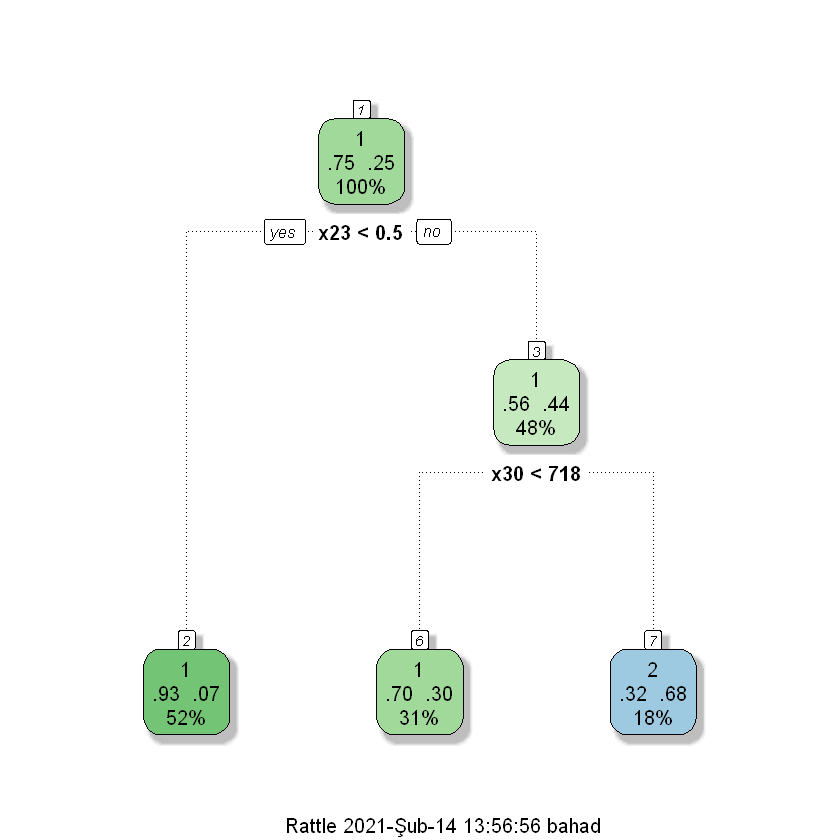

In [11]:
cla_tree=rpart(y_num~.,train,method='class',minbucket=100)
fancyRpartPlot(cla_tree)
cla_tree$variable.importance

In [12]:
PredictCART=predict(cla_tree,newdata=test, type="class")

In [13]:
res_tree=table(test$y,PredictCART)
res_tree

   PredictCART
      1   2
  1 295  18
  2  62  40

### Performanca Measure

In [15]:
library(caret)
library(e1071)

In [16]:
confusionMatrix(data = PredictCART, reference = as.factor(test$y_num), mode = "prec_recall")

Confusion Matrix and Statistics

          Reference
Prediction   1   2
         1 295  62
         2  18  40
                                          
               Accuracy : 0.8072          
                 95% CI : (0.7659, 0.8441)
    No Information Rate : 0.7542          
    P-Value [Acc > NIR] : 0.006104        
                                          
                  Kappa : 0.3916          
                                          
 Mcnemar's Test P-Value : 1.528e-06       
                                          
              Precision : 0.8263          
                 Recall : 0.9425          
                     F1 : 0.8806          
             Prevalence : 0.7542          
         Detection Rate : 0.7108          
   Detection Prevalence : 0.8602          
      Balanced Accuracy : 0.6673          
                                          
       'Positive' Class : 1               
                                          

In [17]:
confusionMatrix(data = PredictCART, reference = as.factor(test$y_num), mode = "sens_spec")

Confusion Matrix and Statistics

          Reference
Prediction   1   2
         1 295  62
         2  18  40
                                          
               Accuracy : 0.8072          
                 95% CI : (0.7659, 0.8441)
    No Information Rate : 0.7542          
    P-Value [Acc > NIR] : 0.006104        
                                          
                  Kappa : 0.3916          
                                          
 Mcnemar's Test P-Value : 1.528e-06       
                                          
            Sensitivity : 0.9425          
            Specificity : 0.3922          
         Pos Pred Value : 0.8263          
         Neg Pred Value : 0.6897          
             Prevalence : 0.7542          
         Detection Rate : 0.7108          
   Detection Prevalence : 0.8602          
      Balanced Accuracy : 0.6673          
                                          
       'Positive' Class : 1               
                              

In [14]:
perf_dt=function(type,actual,forecast){
    name=type
    n=length(actual)
    error=actual-forecast
    mean=mean(actual)
    sd=sd(actual)
    FBias=sum(error)/sum(actual)
    MPE=sum(error/actual)/n
    MAPE=sum(abs(error/actual))/n
    RMSE=sqrt(sum(error^2))/n
    MAD=sum(abs(error))/n
    WMAPE=MAD/mean
    l=data.frame(name,n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE)
    return(l)
}

In [15]:
perf_dt("Decision Tree",test$y_num,as.numeric(PredictCART))

name,n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE
Decision Tree,415,1.245783,0.4310702,0.08510638,0.1180723,0.02155246,0.1927711,0.1547389


## Random Forest 

In [16]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:rattle':

    importance

The following object is masked from 'package:ggplot2':

    margin



In [17]:
random_forest=randomForest(as.factor(y_num)~.,data=train,ntree=200,nodesize=20)
random_forest


Call:
 randomForest(formula = as.factor(y_num) ~ ., data = train, ntree = 200,      nodesize = 20) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 7

        OOB estimate of  error rate: 15.79%
Confusion matrix:
     1   2 class.error
1 1187  65  0.05191693
2  197 210  0.48402948

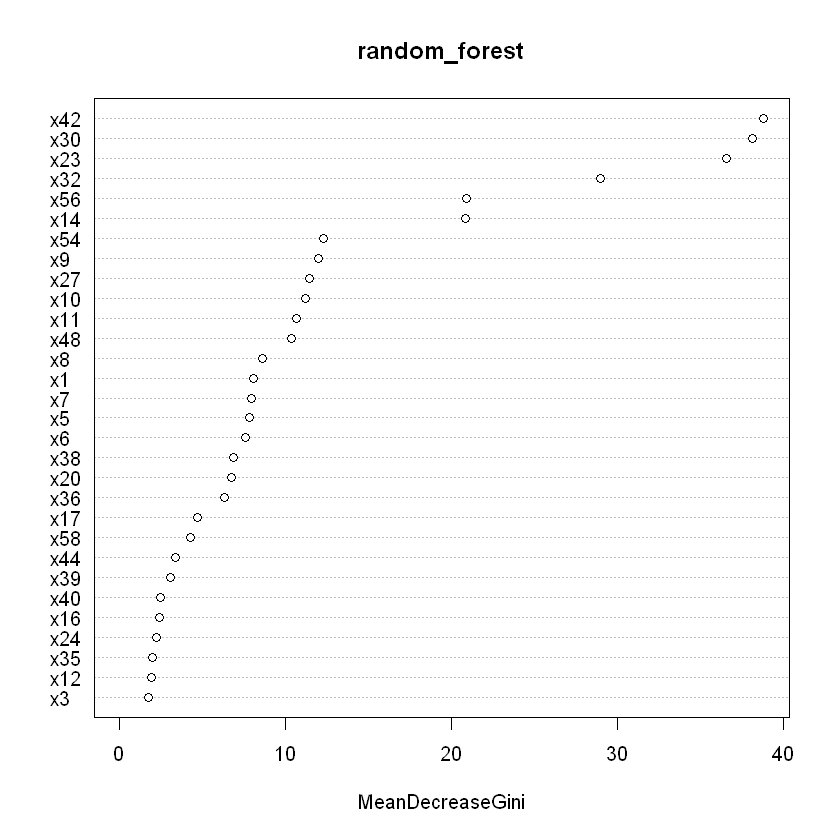

In [18]:
varImpPlot(random_forest)

In [19]:
PredictRandomForest=predict(random_forest,newdata=test)
table(test$y_num,PredictRandomForest)

   PredictRandomForest
      1   2
  1 295  18
  2  52  50

### Performanca Measure

In [20]:
confusionMatrix(data = PredictRandomForest, reference = as.factor(test$y_num), mode = "prec_recall")

Confusion Matrix and Statistics

          Reference
Prediction   1   2
         1 295  52
         2  18  50
                                          
               Accuracy : 0.8313          
                 95% CI : (0.7918, 0.8661)
    No Information Rate : 0.7542          
    P-Value [Acc > NIR] : 9.600e-05       
                                          
                  Kappa : 0.4875          
                                          
 Mcnemar's Test P-Value : 8.005e-05       
                                          
              Precision : 0.8501          
                 Recall : 0.9425          
                     F1 : 0.8939          
             Prevalence : 0.7542          
         Detection Rate : 0.7108          
   Detection Prevalence : 0.8361          
      Balanced Accuracy : 0.7163          
                                          
       'Positive' Class : 1               
                                          

In [21]:
perf_dt("Decision Tree",test$y_num,as.numeric(PredictCART))
perf_dt("Random Forest",test$y_num,as.numeric(PredictRandomForest))

name,n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE
Decision Tree,415,1.245783,0.4310702,0.08510638,0.1180723,0.02155246,0.1927711,0.1547389


name,n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE
Random Forest,415,1.245783,0.4310702,0.06576402,0.1060241,0.02016048,0.1686747,0.1353965


# Decision Tree with Cross-Validation

In [22]:
set.seed(35)

In [23]:
numFolds=trainControl(method="cv",number = 10)
cpGrid=expand.grid(.cp=(0:300)*0.0001)
tr=train(as.factor(y_num)~.,
      data=train, 
      method="rpart",
      trControl=numFolds,
      tuneGrid= cpGrid)
tr

CART 

1659 samples
  60 predictor
   2 classes: '1', '2' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1494, 1492, 1493, 1492, 1493, 1493, ... 
Resampling results across tuning parameters:

  cp      Accuracy   Kappa    
  0.0000  0.8089201  0.4545213
  0.0001  0.8089201  0.4545213
  0.0002  0.8089201  0.4545213
  0.0003  0.8089201  0.4545213
  0.0004  0.8089201  0.4545213
  0.0005  0.8089201  0.4535400
  0.0006  0.8107165  0.4571861
  0.0007  0.8119213  0.4594568
  0.0008  0.8119213  0.4594568
  0.0009  0.8119213  0.4594568
  0.0010  0.8113189  0.4572264
  0.0011  0.8113189  0.4572264
  0.0012  0.8113189  0.4572264
  0.0013  0.8113189  0.4572264
  0.0014  0.8125238  0.4596769
  0.0015  0.8125238  0.4596769
  0.0016  0.8125238  0.4596769
  0.0017  0.8125238  0.4596769
  0.0018  0.8125238  0.4596769
  0.0019  0.8137214  0.4622228
  0.0020  0.8137214  0.4622228
  0.0021  0.8137214  0.4622228
  0.0022  0.8143238  0.4624285
  0.0023  0.8143238  0.4624

x23         x56         x54         x30         x17         x42 
115.6066053 102.1673374  67.1963393  54.1978559  49.2773155  42.0874513 
        x44         x32         x48         x13         x38         x10 
 40.1732953  31.6473082  17.2616459   1.8560910   1.1136546   0.7424364

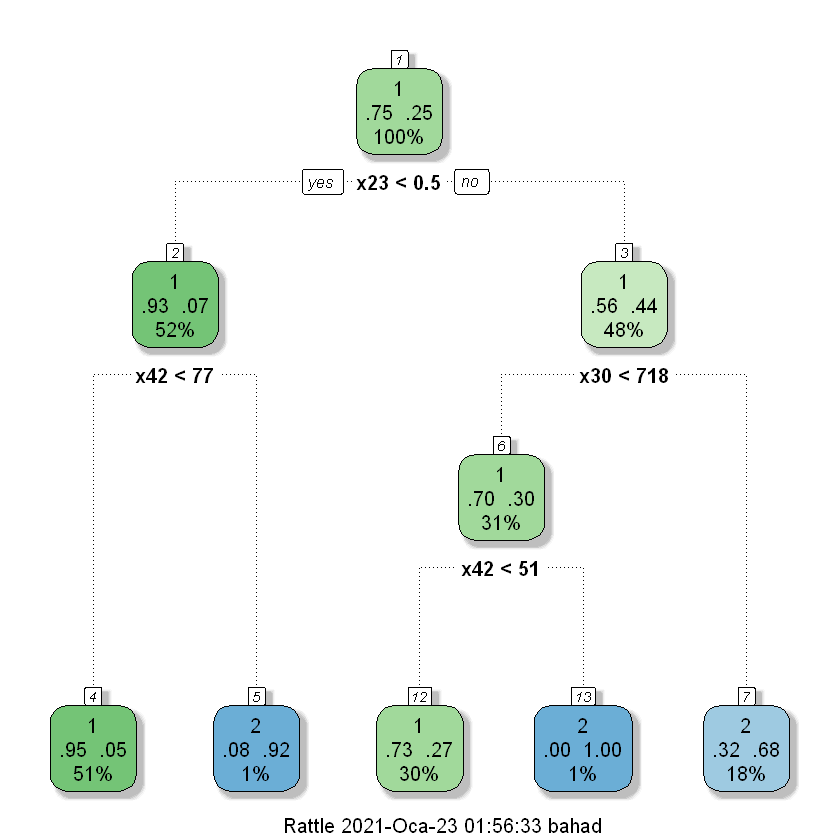

In [24]:
best_tree=tr$finalModel
fancyRpartPlot(best_tree)
best_tree$variable.importance

In [25]:
prediction_best_cv=predict(best_tree,newdata=test,type="class")
table(test$y_num,prediction_best_cv)

   prediction_best_cv
      1   2
  1 295  18
  2  57  45

### Performanca Measure

In [26]:
confusionMatrix(data = prediction_best_cv, reference = as.factor(test$y_num), mode = "prec_recall")

Confusion Matrix and Statistics

          Reference
Prediction   1   2
         1 295  57
         2  18  45
                                          
               Accuracy : 0.8193          
                 95% CI : (0.7788, 0.8551)
    No Information Rate : 0.7542          
    P-Value [Acc > NIR] : 0.0009266       
                                          
                  Kappa : 0.4404          
                                          
 Mcnemar's Test P-Value : 1.145e-05       
                                          
              Precision : 0.8381          
                 Recall : 0.9425          
                     F1 : 0.8872          
             Prevalence : 0.7542          
         Detection Rate : 0.7108          
   Detection Prevalence : 0.8482          
      Balanced Accuracy : 0.6918          
                                          
       'Positive' Class : 1               
                                          

In [27]:
perf_dt("Decision Tree",test$y_num,as.numeric(PredictCART))
perf_dt("Random Forest",test$y_num,as.numeric(PredictRandomForest))
perf_dt("Decision Tree with CV",test$y_num,as.numeric(prediction_best_cv))

name,n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE
Decision Tree,415,1.245783,0.4310702,0.08510638,0.1180723,0.02155246,0.1927711,0.1547389


name,n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE
Random Forest,415,1.245783,0.4310702,0.06576402,0.1060241,0.02016048,0.1686747,0.1353965


name,n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE
Decision Tree with CV,415,1.245783,0.4310702,0.0754352,0.1120482,0.02086808,0.1807229,0.1450677


# Decision Tree with Penalty Matrix

In [28]:
res_tree

   PredictCART
      1   2
  1 295  18
  2  62  40

In [29]:
PenaltyMatrix = matrix(c(0,1.5,2,0), byrow=TRUE, nrow=2)
PenaltyMatrix

0,1.5
2,0.0


x23         x56         x54         x30         x17         x44 
149.9579559 132.5253435  87.1630618  67.9115073  63.9195787  52.1103897 
        x32         x42         x48          x9          x5         x13 
 50.9287700  46.9448011  19.4777261   5.8240001   3.9884340   1.9718168 
        x10         x38          x8         x18         x55         x11 
  1.2400307   1.1830901   0.6597550   0.4559319   0.3039546   0.2517529 
        x58          x1         x21         x35 
  0.1995511   0.1534013   0.1534013   0.1534013

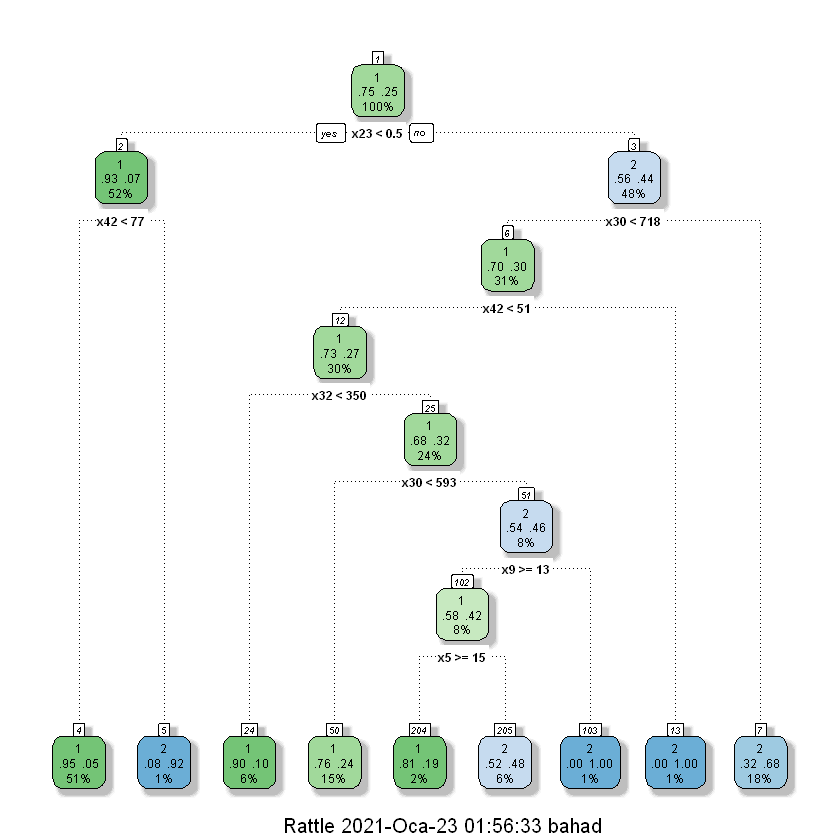

In [30]:
DecTree_pen = rpart(as.factor(y_num) ~ .,
                   data=train, method="class", parms=list(loss=PenaltyMatrix),
                   cp=0.01)
fancyRpartPlot(DecTree_pen)
DecTree_pen$variable.importance

In [31]:
penalized_tree=predict(DecTree_pen,newdata=test,type="class")
table(test$y_num,penalized_tree)

   penalized_tree
      1   2
  1 274  39
  2  41  61

### Performanca Measure

In [32]:
confusionMatrix(data = penalized_tree, reference = as.factor(test$y_num), mode = "prec_recall")

Confusion Matrix and Statistics

          Reference
Prediction   1   2
         1 274  41
         2  39  61
                                          
               Accuracy : 0.8072          
                 95% CI : (0.7659, 0.8441)
    No Information Rate : 0.7542          
    P-Value [Acc > NIR] : 0.006104        
                                          
                  Kappa : 0.4766          
                                          
 Mcnemar's Test P-Value : 0.910979        
                                          
              Precision : 0.8698          
                 Recall : 0.8754          
                     F1 : 0.8726          
             Prevalence : 0.7542          
         Detection Rate : 0.6602          
   Detection Prevalence : 0.7590          
      Balanced Accuracy : 0.7367          
                                          
       'Positive' Class : 1               
                                          

In [33]:
perf_dt("Decision Tree",test$y_num,as.numeric(PredictCART))
perf_dt("Random Forest",test$y_num,as.numeric(PredictRandomForest))
perf_dt("Tree with CV",test$y_num,as.numeric(prediction_best_cv))
perf_dt("Penalty Matrix",test$y_num,as.numeric(penalized_tree))

name,n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE
Decision Tree,415,1.245783,0.4310702,0.08510638,0.1180723,0.02155246,0.1927711,0.1547389


name,n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE
Random Forest,415,1.245783,0.4310702,0.06576402,0.1060241,0.02016048,0.1686747,0.1353965


name,n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE
Tree with CV,415,1.245783,0.4310702,0.0754352,0.1120482,0.02086808,0.1807229,0.1450677


name,n,mean,sd,FBias,MAPE,RMSE,MAD,WMAPE
Penalty Matrix,415,1.245783,0.4310702,0.003868472,0.1433735,0.02155246,0.1927711,0.1547389
